## Ejercicio 1: Implementación de Newton Raphson para 2 dimensiones

### 1. Implemente en Python los siguientes pasos para encontrar el mínimo o el máximo local de una función usando el método de Newton Raphson para dos dimensiones. 

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.patches import Ellipse


### 1.1 Defina y grafique la función $$ y = 3x^3 - 10x^2 - 56x + 50$$

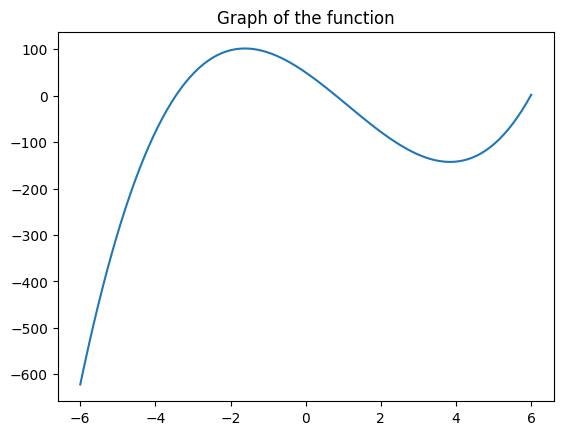

In [2]:
x = sp.symbols('x')

expr = 3*x**3 - 10*x**2 - 56*x + 50

func = sp.lambdify(x, expr, 'numpy')


range = np.linspace(-6,6,100)

values = func(range)


plt.plot(range, values)
plt.title("Graph of the function")
plt.show()

### 1.2 Implementación del Método Newton Raphson

In [3]:
d1 = sp.diff(expr, x)
d2 = sp.diff(d1, x)

f_prime = sp.lambdify(x, d1, 'numpy')

f_double_prime = sp.lambdify(x, d2, 'numpy')


def NewtonRaphson(x0, a, tol):
    x = x0
    iterations = []
    while abs(f_prime(x)) > tol:
        iterations.append((x,func(x)))
        xi = x - (a*(f_prime(x)/f_double_prime(x)))
        x = xi
    return x, iterations

### Puntos 1.3 al 1.6

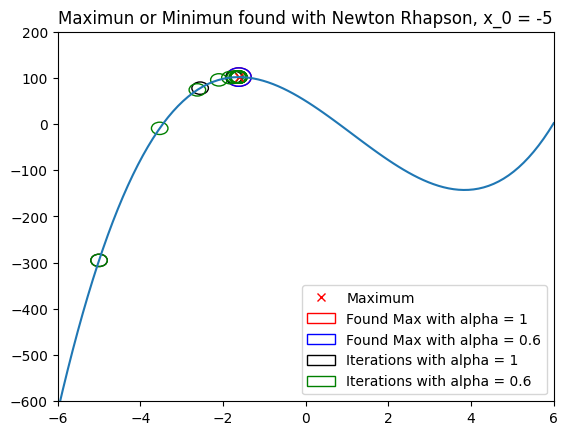

In [4]:
#Define starting point
inicio = -5

#Point found by Newton Method with alpha = 1 
min_or_max = NewtonRaphson(x0 = inicio , a=1, tol=0.0001)[0]

#Iterations by Newton Method with alpha = 1
iterations = NewtonRaphson(x0 = inicio , a=1, tol=0.0001)[1]

#Iterations by Newton Method with alpha = 0.6
iterations2 = NewtonRaphson(x0 = inicio , a=0.6, tol=0.0001)[1]

#Point found by Newton Method with alpha = 0.6
min_or_max2 = NewtonRaphson(x0 = inicio , a=0.6, tol=0.0001)[0]


#Coordinates of max or min point
xy = (min_or_max, func(min_or_max))

#Coordinates of max or min point with alpha = 0.6
xy2 = (min_or_max2, func(min_or_max2))

x_range = 6 - (-6)
y_range = 200 - (-600)

# Calculate the width and height of the circle based on the aspect ratio for the Ellipse
radius = 0.3
width = radius * 2
height = (y_range / x_range) * width

#Create the Ellipse
circle1 = Ellipse(xy=xy, width=width, height=height, color='r', fill=False, label= "Found Max with alpha = 1")

#Create the Ellipse with alpha = 0.6
circle2 = Ellipse(xy=xy2, width=width, height=height, color='blue', fill=False, label= "Found Max with alpha = 0.6")

#Graph the function and the max or min
fig, ax = plt.subplots()
ax = plt.gca()
ax.cla()
ax.set_xlim((-6, 6))
ax.set_ylim((-600, 200))
ax.plot(min_or_max, func(min_or_max), 'x', color='red', label = "Maximum")
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.plot(range, values)
ax.set_title("Maximun or Minimun found with Newton Rhapson, x_0 = -5")

#Graph the points of iteration for alpha = 1
radius = 0.2
width = radius * 2
height = (y_range / x_range) * width

circle = Ellipse(xy=iterations[0], width=width, height=height, color='black', fill=False, label= "Iterations with alpha = 1")
ax.add_patch(circle)

iterations.pop(0)

for iteration in iterations:
    circle1 = Ellipse(xy=iteration, width=width, height=height, color='black', fill=False, label= "_nolegend_")
    ax.add_patch(circle1)

#Graph the points of iteration for alpha = 0.6
radius = 0.2
width = radius * 2
height = (y_range / x_range) * width

circle = Ellipse(xy=iterations2[0], width=width, height=height, color='green', fill=False, label= "Iterations with alpha = 0.6")
ax.add_patch(circle)

iterations2.pop(0)

for iteration in iterations2:
    circle2 = Ellipse(xy=iteration, width=width, height=height, color='green', fill=False, label= "_nolegend_")
    ax.add_patch(circle2)




plt.legend()
plt.show()

## Ejercicio 2: Implementación de Newton Raphson para encontrar todos los máximos y mínimos de una función

### Diseñe un programa que halle y muestre gráficamente todos los mínimos y máximos locales de una función para luego determinar el minino y máximo global de la misma dentro del rango de la figura (entre -3 y 3). Use los métodos de Newton Raphson o los Gradientes para realizar lo solicitado.

La función a implementar es:  $$y=x^5-8x^3+10x+6$$


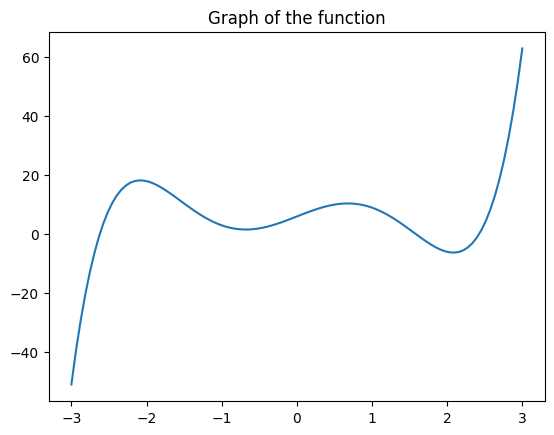

In [5]:
x = sp.symbols('x')

expr = x**5 - 8*x**3 + 10*x + 6

func = sp.lambdify(x, expr, 'numpy')


range = np.linspace(-3,3,100)

values = func(range)


plt.plot(range, values)
plt.title("Graph of the function")
plt.show()

In [6]:
d1 = sp.diff(expr, x)
d2 = sp.diff(d1, x)

f_prime = sp.lambdify(x, d1, 'numpy')

f_double_prime = sp.lambdify(x, d2, 'numpy')

dic = {}

#Corrigir para que tenga en cuenta estas funciones.

def NewtonRaphson(x0, a, tol):
    x = x0
    while abs(f_prime(x)) > tol:
        xi = x - (a*(f_prime(x)/f_double_prime(x)))
        x = xi
    return x

for numero in range:
    max_or_min = NewtonRaphson(x0 = numero , a=1, tol=0.0001)
    max_or_min = round(max_or_min, 4)
    if max_or_min not in dic:
        dic[max_or_min] = func(max_or_min)

max_global = max(dic, key=dic.get)
min_global = min(dic, key=dic.get)

print("Global Maximum: ", max_global, "Value: ", dic[max_global])
print("Global Minimum: ", min_global, "Value: ", dic[min_global])


    

Global Maximum:  -2.083 Value:  18.258776293749367
Global Minimum:  2.083 Value:  -6.258776293749367


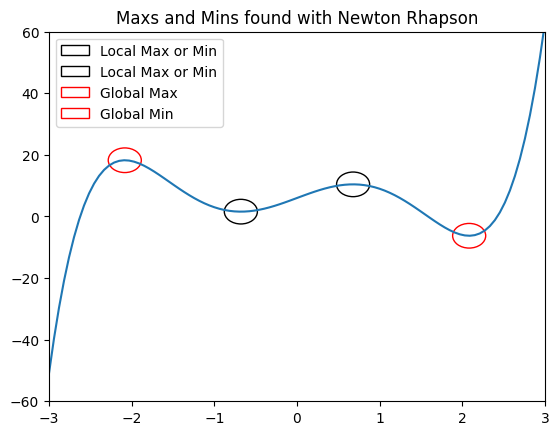

In [7]:
xy_max = (max_global, dic[max_global])
xy_min = (min_global, dic[min_global])

dic.pop(max_global)
dic.pop(min_global)

x_range = 3 - (-3)
y_range = 60 - (-60)

# Calculate the width and height of the circle based on the aspect ratio for the Ellipse
radius = 0.2
width = radius * 2
height = (y_range / x_range) * width

#Create the Ellipse
circle1 = Ellipse(xy=xy_max, width=width, height=height, color='r', fill=False, label= "Global Max")

circle2 = Ellipse(xy=xy_min, width=width, height=height, color='r', fill=False, label= "Global Min")

fig, ax = plt.subplots()
ax = plt.gca()
ax.cla()
ax.set_xlim((-3, 3))
ax.set_ylim((-60, 60))
ax.plot(range, values)
ax.set_title("Maxs and Mins found with Newton Rhapson")

for llave in dic:
    xy = (llave, dic[llave])
    circle = Ellipse(xy=xy, width=width, height=height, color='black', fill=False, label= "Local Max or Min")
    ax.add_patch(circle)

ax.add_patch(circle1)
ax.add_patch(circle2)
plt.legend()

# Punto 3: Implementación de Newton Raphson para 3 dimensiones


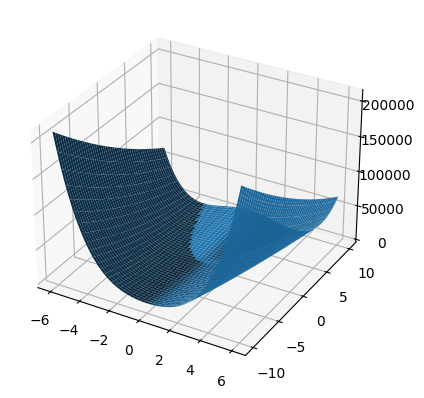

In [8]:
def f(x,y):
    return (x-1)**2 + 100 *(y-x**2)**2


x= np.linspace(-6,6,100)
y= np.linspace(-10,10,100)
X,Y= np.meshgrid(x,y)
Z= f(X,Y)
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)


[[ 0.00000000e+00  1.00000000e+01]
 [-5.00250125e-04  0.00000000e+00]
 [ 9.99949927e-01 -1.00070040e-03]
 [ 9.99950176e-01  9.99900355e-01]
 [ 1.00000000e+00  9.99999998e-01]]


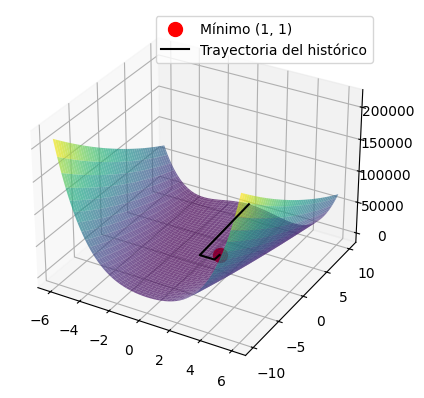

In [9]:
from scipy.misc import derivative
import sympy as sp

def gradiente(x, y):
    X, Y = sp.symbols('X Y')
    expr = (X - 1)**2 + 100 * (Y - X**2)**2
    grad = [sp.diff(expr, X), sp.diff(expr, Y)]
    grad_ev = [g.subs({X: x, Y: y}) for g in grad]
    return np.array(grad_ev, dtype=float)

def Hess(x, y):
    X, Y = sp.symbols('X Y')
    expr = (X - 1)**2 + 100 * (Y - X**2)**2
    H = sp.hessian(expr, (X, Y))
    hess = H.subs({X: x, Y: y})
    return np.array(hess, dtype=float)


def newthon_raps():
    i=1
    xi=0
    yi=10
    x= np.array([xi,yi])
    x_hist= [x.copy()]
    a=1
    dif= np.linalg.norm(gradiente(xi,yi))
    eps= 10e-3
    n= 200
    while dif > eps and n>i:
        grad= gradiente(x[0],x[1])
        hess= Hess(x[0],x[1])
        x= x - a*  np.linalg.inv(hess).dot(grad)
        x_hist.append(x.copy())
        dif= np.linalg.norm(grad)
        i+=1
    return x,x_hist

mini,hist= newthon_raps()
hist = np.array(hist)
print(hist)

x= np.linspace(-6,6,100)
y= np.linspace(-10,10,100)
X,Y= np.meshgrid(x,y)
Z= f(X,Y)
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis', alpha=0.7)
ax.scatter(mini[0],mini[1], f(mini[0],mini[1]), color='r', s=100, label="Mínimo (1, 1)", zorder=5)

x_line = hist[:, 0]
y_line = hist[:, 1]
z_line = np.array([f(xi, yi) for xi, yi in zip(x_line, y_line)])
ax.plot(x_line, y_line, z_line, color='black', label="Trayectoria del histórico", zorder=6)

plt.legend()
plt.show()



